In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# Logistic regression - categorical (YES/NO) (Classification model)
# Linear regression - numerical (Getting a value) (Regression model) (continuous)
"""
Supervised ==> have a dataset with features and cases
Unsupervised ==> no features, like a text file or reviews in google/a product review 
Reinforcement ==> self deriving car (algorithm/machine learns to perform an action from experience)

Overfitting - trying to fit every single dot (like trying to get 99% accuracy) (testdata)
underfitting - Training model is not giving high percentage (for example, 60%)

Low variance and low bias is good while creating a model
"""

'\nSupervised ==> have a dataset with features and cases\nUnsupervised ==> no features, like a text file or reviews in google/a product review \nReinforcement ==> self deriving car (algorithm/machine learns to perform an action from experience)\n\nOverfitting - trying to fit every single dot (like trying to get 99% accuracy) (testdata)\nunderfitting - Training model is not giving high percentage (for example, 60%)\n\nLow variance and low bias is good while creating a model\n'

In [ ]:
df = pd.read_csv("titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


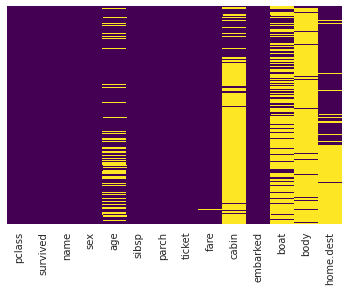

In [ ]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= False, cmap='viridis')

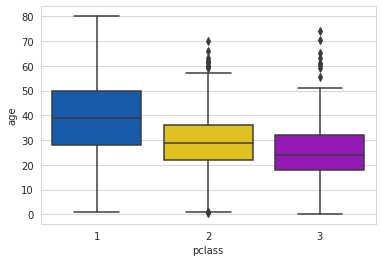

In [ ]:
sns.boxplot(x = 'pclass', y = 'age', data = df, palette = 'prism')

In [ ]:
# for oct4: How do we know these ages? a Boxplot will tell us?
# 
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else: 
      return 24
  else:
    return Age

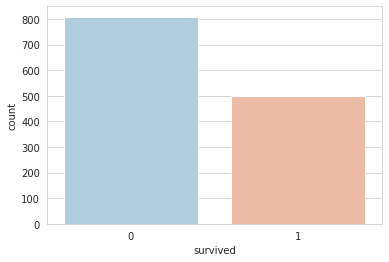

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'survived', data = df, palette = 'RdBu_r')

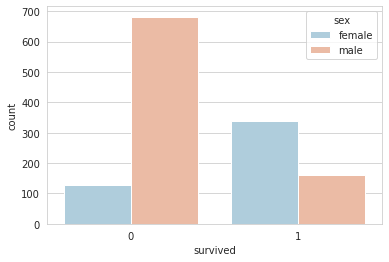

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'survived', hue = 'sex', data = df, palette = 'RdBu_r')

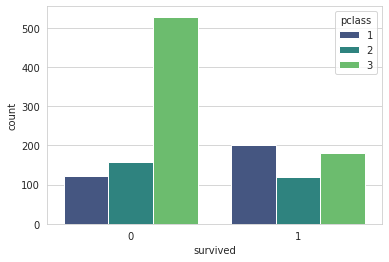

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'survived', hue = 'pclass', data = df, palette = 'viridis')

In [ ]:
# sns.set_style('whitegrid')
# sns.countplot(x = 'survived', data = df, palette = 'viridis')

In [ ]:
# sns.set_style('whitegrid')
# sns.countplot(x = 'survived', hue = 'pclass', data = df, palette = 'viridis')

In [ ]:
# sns.set_style('whitegrid')
# sns.countplot(x = 'survived', hue = 'pclass', data = df, palette = 'viridis')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


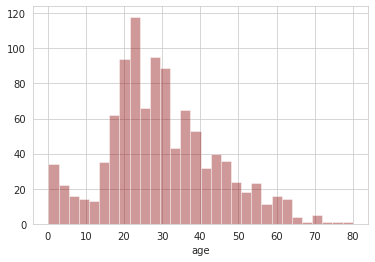

In [ ]:
sns.distplot(df['age'].dropna(), kde = False, color = 'darkred', bins = 30)

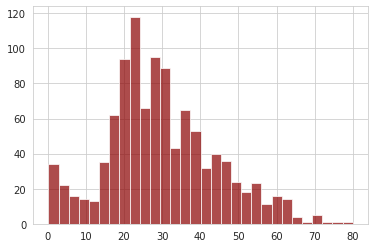

In [ ]:
df['age'].hist(bins = 30, color = 'darkred', alpha = 0.7)

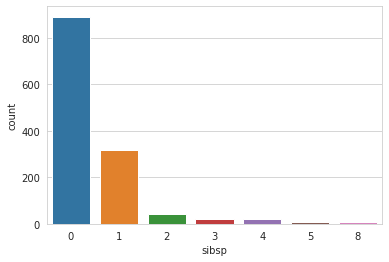

In [ ]:
sns.countplot(x = 'sibsp', data = df)

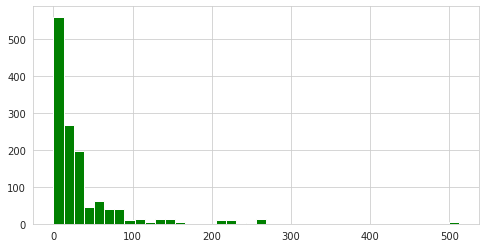

In [ ]:
df['fare'].hist(color = 'green', bins = 40, figsize = (8,4))

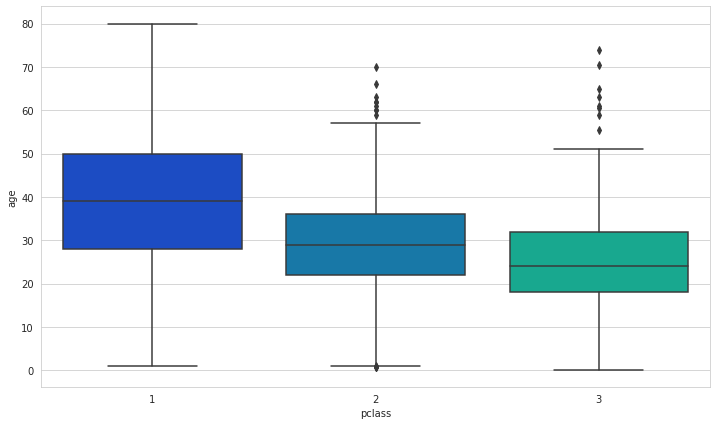

In [ ]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'pclass', y = 'age', data = df, palette = 'winter')

In [ ]:
df['age'] = df[['age', 'pclass']].apply(impute_age, axis=1)

In [ ]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
pd.get_dummies(df['sex'])

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1304,1,0
1305,1,0
1306,0,1
1307,0,1


In [ ]:
gender = pd.get_dummies(df['sex'], drop_first = True)
gender

,male
0,0
1,1
2,0
3,1
4,0
...,...
1304,0
1305,0
1306,1
1307,1


In [ ]:
df.drop(['sex'], axis=1)
df.info()
df.drop(['sex'], axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0

In [ ]:
df = pd.concat([df, gender], axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   age        1309 non-null   float64
 4   sibsp      1309 non-null   int64  
 5   parch      1309 non-null   int64  
 6   ticket     1309 non-null   object 
 7   fare       1308 non-null   float64
 8   cabin      295 non-null    object 
 9   embarked   1307 non-null   object 
 10  boat       486 non-null    object 
 11  body       121 non-null    float64
 12  home.dest  745 non-null    object 
 13  male       1309 non-null   uint8  
dtypes: float64(3), int64(4), object(6), uint8(1)
memory usage: 134.3+ KB


,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [ ]:
embarked = pd.get_dummies(df['embarked'], drop_first = True)

In [ ]:
df = pd.concat([df, embarked], axis = 1)

In [ ]:
df.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   age       1309 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   fare      1308 non-null   float64
 6   embarked  1307 non-null   object 
 7   male      1309 non-null   uint8  
 8   Q         1309 non-null   uint8  
 9   S         1309 non-null   uint8  
dtypes: float64(2), int64(4), object(1), uint8(3)
memory usage: 75.5+ KB


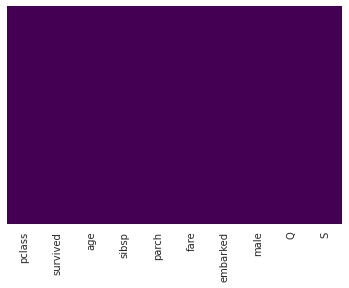

In [ ]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= False, cmap='viridis')

In [ ]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   int64  
 1   survived  1306 non-null   int64  
 2   age       1306 non-null   float64
 3   sibsp     1306 non-null   int64  
 4   parch     1306 non-null   int64  
 5   fare      1306 non-null   float64
 6   embarked  1306 non-null   object 
 7   male      1306 non-null   uint8  
 8   Q         1306 non-null   uint8  
 9   S         1306 non-null   uint8  
dtypes: float64(2), int64(4), object(1), uint8(3)
memory usage: 85.5+ KB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('survived', axis = 1), df['survived'], test_size = 30, random_state = 101)
df.info()
df.drop(['embarked'], axis = 1, inplace =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   int64  
 1   survived  1306 non-null   int64  
 2   age       1306 non-null   float64
 3   sibsp     1306 non-null   int64  
 4   parch     1306 non-null   int64  
 5   fare      1306 non-null   float64
 6   embarked  1306 non-null   object 
 7   male      1306 non-null   uint8  
 8   Q         1306 non-null   uint8  
 9   S         1306 non-null   uint8  
dtypes: float64(2), int64(4), object(1), uint8(3)
memory usage: 85.5+ KB


In [ ]:
# from sklearn.linear_model import LogisticRegression
# logmodel = LogisticRegression()
# logmodel.fit(X_train, y_train)

ValueError: ignored